In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import joblib


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split



In [ ]:
import zipfile
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d hassan06/nslkdd

100% 13.9M/13.9M [00:00<00:00, 60.5MB/s]
100% 13.9M/13.9M [00:00<00:00, 55.2MB/s]


In [ ]:
with zipfile.ZipFile("/content/nslkdd.zip", "r") as zip_ref:
    # Extract all contents of the zip file to the current working directory
    zip_ref.extractall()

In [ ]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [ ]:
train='/content/KDDTrain+.txt'
test='/content/KDDTest+.txt'
test21='/content/KDDTest-21.txt'
train_data=pd.read_csv(train,names=feature)
test_data=pd.read_csv(test,names=feature)
test_data21 = pd.read_csv(test21, names= feature)
data= pd.concat([train_data, test_data], ignore_index=True)

In [ ]:
data.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune,19


In [ ]:
# fueturs of the dataset
print(data.columns.tolist())
print("number of featurs are: ", len(data.columns.tolist()))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty']
number of featurs are:  43


In [ ]:
# check if there nulls in the dataset
data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,148517.0,276.779305,2.460683e+03,0.0,0.00,0.00,0.00,5.771500e+04
src_bytes,148517.0,40227.949299,5.409612e+06,0.0,0.00,44.00,278.00,1.379964e+09
dst_bytes,148517.0,17088.853593,3.703525e+06,0.0,0.00,0.00,571.00,1.309937e+09
land,148517.0,0.000215,1.467714e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,148517.0,0.020523,2.400691e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,148517.0,0.000202,1.941708e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,148517.0,0.189379,2.013160e+00,0.0,0.00,0.00,0.00,1.010000e+02
num_failed_logins,148517.0,0.004323,7.224823e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,148517.0,0.402789,4.904606e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,148517.0,0.255062,2.223137e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [ ]:
#number of values of each feature
values_fueture = {key:len(data[key].unique()) for key in data.columns.tolist()}

In [ ]:
values_fueture

{'duration': 3424,
 'protocol_type': 3,
 'service': 70,
 'flag': 11,
 'src_bytes': 3601,
 'dst_bytes': 10401,
 'land': 2,
 'wrong_fragment': 3,
 'urgent': 4,
 'hot': 29,
 'num_failed_logins': 6,
 'logged_in': 2,
 'num_compromised': 96,
 'root_shell': 2,
 'su_attempted': 3,
 'num_root': 91,
 'num_file_creations': 36,
 'num_shells': 4,
 'num_access_files': 10,
 'num_outbound_cmds': 1,
 'is_host_login': 2,
 'is_guest_login': 2,
 'count': 512,
 'srv_count': 512,
 'serror_rate': 99,
 'srv_serror_rate': 94,
 'rerror_rate': 98,
 'srv_rerror_rate': 95,
 'same_srv_rate': 101,
 'diff_srv_rate': 101,
 'srv_diff_host_rate': 87,
 'dst_host_count': 256,
 'dst_host_srv_count': 256,
 'dst_host_same_srv_rate': 101,
 'dst_host_diff_srv_rate': 101,
 'dst_host_same_src_port_rate': 101,
 'dst_host_srv_diff_host_rate': 75,
 'dst_host_serror_rate': 101,
 'dst_host_srv_serror_rate': 101,
 'dst_host_rerror_rate': 101,
 'dst_host_srv_rerror_rate': 101,
 'label': 40,
 'difficulty': 22}

In [ ]:
#values of "num_outbound_cmds" lable
data['num_outbound_cmds'].unique()

array([0])

In [ ]:
data = data.drop("num_outbound_cmds", axis=1)

In [ ]:
data['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [ ]:
# to_catogories function to transfer data
def to_catogories(data, feature):
  one_hot_encoded = pd.get_dummies(data[feature], prefix=feature)
  data = pd.concat([data, one_hot_encoded], axis=1)

  return data.drop(feature, axis=1)

In [ ]:
data = to_catogories(data, "protocol_type")

In [ ]:
data["service"].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [ ]:
data = to_catogories(data, "service")

In [ ]:
data["flag"].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [ ]:
data = to_catogories(data, "flag")

In [ ]:
data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,794,333,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
148513,0,317,938,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
148514,0,54540,8314,0,0,0,2,0,1,1,...,0,0,0,0,0,0,0,0,1,0
148515,0,42,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data["label"].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [ ]:
#change lable if it is normal to 1 and if it is anomaly to 0
data['label'] = data['label'].apply(lambda x: 1 if x == "normal" else 0)

In [ ]:
data["label"].unique()

array([1, 0])

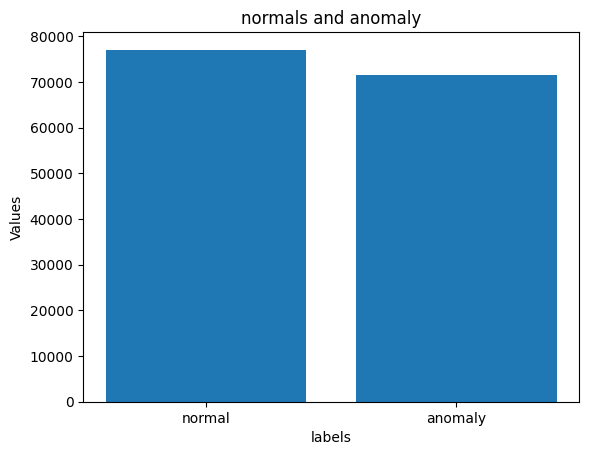

In [ ]:
#data equilibration
labels = ["normal", "anomaly"]
values = [len(data[data["label"]==1]), len(data[data["label"]==0])]
plt.bar(labels, values)
plt.xlabel('labels')
plt.ylabel('Values')
plt.title("normals and anomaly")
plt.show()

In [ ]:
data.to_csv("/content/drive/MyDrive/data security, mini project/processedDataset.csv", index=False)

# Traing Naivebase

In [ ]:
#load data
data=pd.read_csv("/content/drive/MyDrive/data security, mini project/processedDataset.csv")

In [ ]:
label = data["label"]
data = data.drop("label", axis=1)

In [ ]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, label, test_size=0.2, random_state=42)

In [ ]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = naive_bayes_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8139307837328306
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.61      0.76     14254
           1       0.74      1.00      0.85     15450

    accuracy                           0.81     29704
   macro avg       0.87      0.81      0.80     29704
weighted avg       0.86      0.81      0.81     29704



In [ ]:
#save the model
model_filename = '/content/drive/MyDrive/data security, mini project/NSL_KDD_with_NB.pkl'
joblib.dump(naive_bayes_classifier, model_filename)

['/content/drive/MyDrive/data security, mini project/NSL_KDD_with_NB.pkl']

In [ ]:
#load the model
loaded_model = joblib.load('/content/drive/MyDrive/data security, mini project/NSL_KDD_with_NB.pkl')

# Use LSTM

In [ ]:
n_hidden_units = 50  # Number of LSTM units
n_epochs = 10
batch_size = 32

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
model = Sequential()
model.add(LSTM(n_hidden_units, input_shape=(1, 122)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
3713/3713 [==============================] - 30s 7ms/step - loss: 0.0404 - accuracy: 0.9879 - val_loss: 0.0160 - val_accuracy: 0.9939
Epoch 2/10
3713/3713 [==============================] - 28s 8ms/step - loss: 0.0119 - accuracy: 0.9954 - val_loss: 0.0117 - val_accuracy: 0.9953
Epoch 3/10
3713/3713 [==============================] - 27s 7ms/step - loss: 0.0091 - accuracy: 0.9965 - val_loss: 0.0111 - val_accuracy: 0.9951
Epoch 4/10
3713/3713 [==============================] - 17s 4ms/step - loss: 0.0076 - accuracy: 0.9970 - val_loss: 0.0095 - val_accuracy: 0.9962
Epoch 5/10
3713/3713 [==============================] - 24s 6ms/step - loss: 0.0067 - accuracy: 0.9973 - val_loss: 0.0094 - val_accuracy: 0.9961
Epoch 6/10
3713/3713 [==============================] - 16s 4ms/step - loss: 0.0062 - accuracy: 0.9975 - val_loss: 0.0081 - val_accuracy: 0.9969
Epoch 7/10
3713/3713 [==============================] - 16s 4ms/step - loss: 0.0055 - accuracy: 0.9978 - val_loss: 0.0077 - val_ac

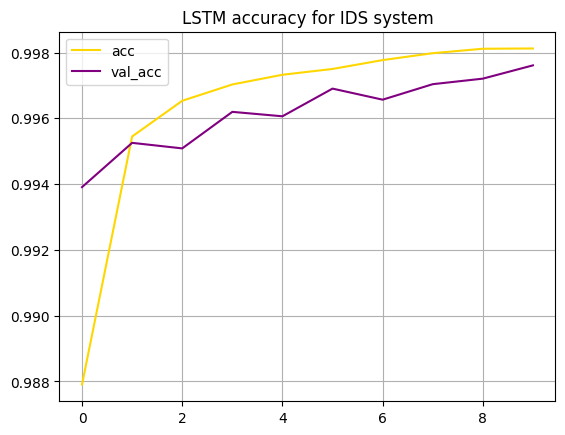

In [ ]:
plt.grid(True, which='both')
plt.plot(hist.history['accuracy'], color='gold')
plt.plot(hist.history['val_accuracy'], color='purple')
plt.title('LSTM accuracy for IDS system')
plt.legend(['acc', 'val_acc'])
plt.savefig("/content/drive/MyDrive/data security, mini project/NSL_KDD_LSTM_accuracy.png", transparent=True)
plt.show()

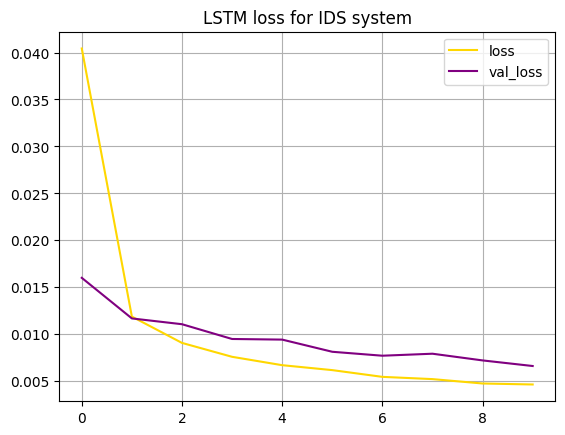

In [ ]:
plt.grid(True, which='both')
plt.plot(hist.history['loss'], color='gold')
plt.plot(hist.history['val_loss'], color='purple')
plt.title('LSTM loss for IDS system')
plt.legend(['loss', 'val_loss'])
plt.savefig("/content/drive/MyDrive/data security, mini project/NSL_KDD_LSTM_loss.png", transparent=True)
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print(f'Accuracy: {accuracy * 100:.2f}%')

929/929 [==============================] - 2s 2ms/step - loss: 0.0066 - accuracy: 0.9976
Accuracy: 99.76%


In [ ]:
# Save the model architecture as a JSON string
model_json = model.to_json()

# Save the JSON string to a file
with open('/content/drive/MyDrive/data security, mini project/NSL_KDD_with_LSTM.json', 'w') as json_file:
    json_file.write(model_json)

print('Model architecture saved as JSON file.')

Model architecture saved as JSON file.


In [ ]:
# Save the trained model as an HDF5 file
model.save('/content/drive/MyDrive/data security, mini project/NSL_KDD_with_LSTM.h5')
print('Model saved as HDF5 file.')

Model saved as HDF5 file.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# load the model
from tensorflow.keras.models import model_from_json

with open('/content/drive/MyDrive/data security, mini project/NSL_KDD_with_LSTM.json', 'r') as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                34600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 34651 (135.36 KB)
Trainable params: 34651 (135.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Load the model weights from the HDF5 file
loaded_model.load_weights('/content/drive/MyDrive/data security, mini project/NSL_KDD_with_LSTM.h5')

In [ ]:
loss, accuracy = loaded_model.evaluate(X_test, y_test, batch_size=32)

929/929 [==============================] - 3s 2ms/step - loss: 0.0066 - accuracy: 0.9976
